In [14]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [15]:
from helpers import load_data

# load dataset
x, y = load_data()

In [16]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)



In [17]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    ind_te = k_indices[k]
    ind_tr = k_indices[~(np.arange(k_indices.shape[0]) == k)]
    ind_tr = ind_tr.reshape(-1)
    
    # Training Data
    y_tr = y[ind_tr]
    x_tr = x[ind_tr]
    tx_tr = build_poly(x_tr,degree)    
    
    # Test data
    y_te = y[ind_te]
    x_te = x[ind_te]
    tx_te = build_poly(x_te, degree)
    
    # ***************************************************
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    _, w_ridge = ridge_regression(y_tr, tx_tr, lambda_)
    loss_tr = compute_mse(y_tr, tx_tr, w_ridge)
    loss_te = compute_mse(y_te, tx_te, w_ridge)

    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    return loss_tr, loss_te

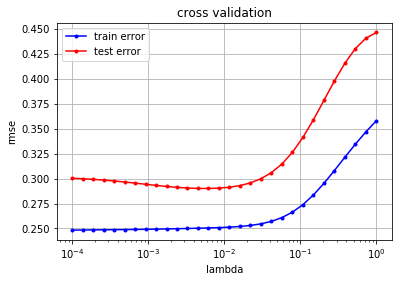

In [18]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    cross_validation(y,x,k_indices,2, 0.5, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    loss_tr_temp = []
    loss_te_temp = []
    for ind, lambda_ in enumerate(lambdas):
        for k in range(k_fold):
            loss_tr, loss_te = cross_validation(y,x,k_indices,k, lambda_, degree)
            loss_tr_temp.append(loss_tr)
            loss_te_temp.append(loss_te)
            
        rmse_tr.append(np.sqrt(2*np.mean(loss_tr_temp)))
        rmse_te.append(np.sqrt(2*np.mean(loss_te_temp)))
        
        loss_tr_temp = []
        loss_te_temp = []

    # ***************************************************    
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

In [19]:
def least_squares(y, tx):
    """calculate the least squares."""
    a = tx.T.dot(tx)
    b = tx.T.dot(y)
    return np.linalg.solve(a, b)


[0.47045545 0.45051219 0.26669518 0.26455843 0.26455842 0.26242215
 0.26188506 0.26060177 0.26025782 0.25838723 0.2577921  0.25699859
 0.25533154 0.25257749 0.25356672 0.25256183 0.30107821 0.25207438
 0.24771237] [0.53736457 0.56147241 0.31474195 0.31745642 0.31747471 0.31804768
 0.31697227 0.32592212 0.32244125 0.3472243  0.40159542 0.35571728
 0.32818324 0.64479516 0.53780621 0.67716799 3.11714485 0.43834037
 0.69202619]


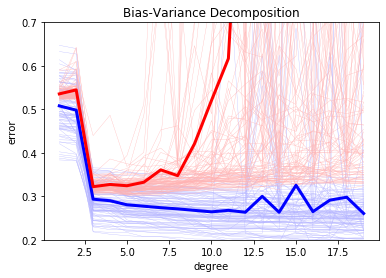

In [21]:
from split_data import split_data
from plots import bias_variance_decomposition_visualization
from costs import compute_mse
from build_polynomial import build_poly

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100,200)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 20)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T

        # Split data
        y_tr, x_tr, y_te, x_te = split_data(y, x, ratio_train, seed)
        
        for degree in degrees:
            tx_tr = build_poly(x_tr, degree)
            tx_te = build_poly(x_te, degree)
            
            w = least_squares(y_tr, tx_tr)
            
            loss_tr = compute_mse(y_tr, tx_tr, w)
            loss_te = compute_mse(y_te, tx_te, w)
            
            rmse_tr[index_seed, degree-1] = np.sqrt(2*loss_tr)
            rmse_te[index_seed, degree-1] = np.sqrt(2*loss_te)

    print(rmse_tr[-1], rmse_te[-1])
    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()

NameError: name 'rmse_tr' is not defined